<a href="https://colab.research.google.com/github/jiiiisoo/machinelearning/blob/main/4.%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98_2D%EC%9E%85%EB%A0%A5%203%ED%81%B4%EB%9E%98%EC%8A%A4%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2차원 입력 3클래스 분류**

3클래스 이상의 클래스 분류에서는 소프트맥스 함수를 모델의 출력에 사용한다.

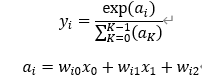

In [13]:
##data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
N=100 #데이터 수
K=3 #분포 수
T3=np.zeros((N,3), dtype=np.uint8)
T2=np.zeros((N,2), dtype=np.uint8)
X=np.zeros((N,2))
X_range0=[-3,3] #X0범위 표시
X_range1=[-3,3] #X1범위 표시
Mu=np.array([[-.5,-.5],[.5,1.0],[1,-.5]]) #X입력의 초기값 (중심)
Sig=np.array([[.7,.7],[.8,.3],[.3,.8]]) #X입력의 분산
Pi=np.array([0.4,0.8,1]) #각 분포에 대한 비율
for n in range(N):
  wk=np.random.rand()
  for k in range(K):
    if wk<Pi[k]:
      T3[n,k]=1 #어느 클래스에 있는지 표시 / if k[0]==1: 클래스0소속, k[1]==1: 클래스1소속, k[2]==1: 클래스2소속
      break
  for k in range(2):
    X[n,k]=(np.random.randn()*Sig[T3[n,:]==1,k]+Mu[T3[n,:]==1,k])

##data 표시
def show_data2(x,t):
  wk,K=t.shape #2클래스분류: t.shape==2, 3클래스분류: t.shape==3
  c=[[.5,.5,.5],[1,1,1],[0,0,0]] #클래스 별 색
  for k in range(K):
    plt.plot(x[t[:,k]==1,0],x[t[:,k]==1,1],linestyle='None', markeredgecolor='black', marker='o', color=c[k],alpha=0.8)
    plt.grid(True)

##3클래스용 로지스틱 회귀 모델
def logistic3(x0,x1,w):
  K=3
  n=len(x1)
  y=np.zeros((n,K))
  w=w.reshape((3,3)) #w_i0,w_i1,w_i2 로 정렬하기 위함
  for k in range(K):
    y[:,k]=np.exp(w[k,0]*x0+w[k,1]*x1+w[k,2])
  wk=np.sum(y,axis=1) #행 하나로 출력
  wk=y.T/wk
  y=wk.T
  return y


**교차 엔트로피 오차**

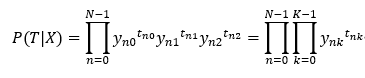

따라서 E(W)는 음의 로그 평균이므로 위의 식에 로그를 취한 뒤 N으로 나누고 -부호를 붙이면 된다.

In [2]:
#cross-entropy error function
def cee_logistic3(w,x,t):
  X_n=x.shape[0]
  y=logistic3(x[:,0],x[:,1],w)
  cee=0
  N,K=y.shape #y의 행 수, 열 수를 차례로 나타냄
  for n in range(N):
    for k in range(K):
      cee-=t[n,k]*np.log(y[n,k])
  cee/=X_n
  return cee



**경사 하강법에 의한 해**

E(W)를 최소화하기 위해 w_nk로 각각 편미분해야 하는데 그 방법은 소프트맥스 함수의 미분 계산이 필요하므로 뒤에 나올 신경망, 딥러닝에서 다루도록 한다. 결과만 확인하면 다음과 같다.

In [7]:
from scipy.optimize import minimize
##cross-entropy error function의 미분
def dcee_logistic3(w,x,t):
  X_n=x.shape[0]
  y=logistic3(x[:,0],x[:,1],w)
  dcee=np.zeros((3,3))
  N,K=y.shape
  for n in range(N):
    for k in range(K):
      dcee[k,:]-=(t[n,k]-y[n,k])*np.r_[x[n,:],1] #np.r_: ???
  dcee/=X_n
  return dcee.reshape(-1)

##매개변수 찾기
def fit_logistic3(w_init,x,t):
  res=minimize(cee_logistic3,w_init,args=(x,t), jac=dcee_logistic3, method='CG')
  return res.x

##모델 등고선 2D 표시
def show_contour_logistic3(w):
  xn=30
  x0=np.linspace(X_range0[0],X_range0[1],xn)
  x1=np.linspace(X_range1[0],X_range1[1],xn)
  xx0,xx1=np.meshgrid(x0,x1)
  y=np.zeros((xn,xn,3))
  for i in range(xn):
    wk=logistic3(xx0[:,i],xx1[:,i],w)
    for j in range(3):
      y[:,i,j]=wk[:,j]
  for j in range(3):
    cont=plt.contour(xx0,xx1,y[:,:,j],levels=(0.5,0.9),colors=['cornflowerblue','k'])
    cont.clabel(fmt='%1.1f',fontsize=9)
  plt.grid(True)
  


show_contour_logistic3는 매개 변수 w를 전달하면 표시할 입력 공간을 30*30으로 분할하여 모든 입력에 대한 출력을 확인하고 각각의 카테고리에서 0.5 또는 0.9 이상의 출력을 얻을 수 있는 영역을 등고선으로 표시한다.

W=[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE=0.23


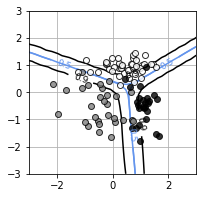

In [14]:
##main
W_init=np.zeros((3,3))
W=fit_logistic3(W_init,X,T3)
print("W={}".format(np.round(W.reshape((3,3)),2)))
cee=cee_logistic3(W,X,T3)
print("CEE={:.2f}".format(cee))
plt.figure(figsize=(3,3))
show_data2(X,T3)
show_contour_logistic3(W)
plt.show()



출처: 파이썬으로 배우는 머신러닝의 교과서-이시카와아키히코